In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sp
import math
from scipy.integrate import odeint
%matplotlib notebook

In [2]:
def EqOfMovement(y, t, m1, m, r, c1, c, g):
    dy = np.zeros_like(y)
    dy[0] = y[2]  # там уже содердится нужная производная
    dy[1] = y[3]
    
    a11 = -m*r*np.cos(y[1])
    a12 = (2*m1+m)*r**2+m*y[0]**2+2*m*r*y[0]*np.sin(y[1])
    a21 = 1
    a22 = -r*np.cos(y[1])
    b1 = -c1*r**2*y[1]-m*g*y[0]*np.cos(y[1])-m*r*np.cos(y[1])*y[0]*y[3]**2-2*m*(y[0]+r*np.sin(y[1]))*y[2]*y[3]
    b2 = -2*(c/m)*y[0]-g*np.sin(y[1])+y[0]*y[3]**2
    
    dy[2] = (b1*a22-b2*a12)/(a11*a22-a21*a12)  # правило Крамера
    dy[3] = (b2*a11-b1*a21)/(a11*a22-a21*a12)
    return dy

In [3]:
def spring(x1, y1, x2, y2, n, sh):
    kords = []
    X_Spr = np.zeros(n)
    Y_Spr = np.zeros(n)
    X_Spr[0] = x1    # начальный край пружины находится в точке 0
    Y_Spr[0] = y1
    X_Spr[n-1] = x2     # конечный край пружины находится в точке 1   
    Y_Spr[n-1] = y2      
    for i in range(1, n-1): # остальные изломы пружины
        X_Spr[i] = x1+i*(x2-x1)/n
        Y_Spr[i] = y1 + sh*(-1)**i # (-1)**i решает, вверх или вниз направлен текущий излом
    kords.append(X_Spr)
    kords.append(Y_Spr)
    return kords

In [4]:
m1 = 1
m = 0.5
r = 1
c = 5
g = 9.81
c1 = 5
t0 = 0
phi0 = math.pi/2
s0 = 0
dphi0 = 1 
ds0 = 0
y0 = [s0, phi0, ds0, dphi0]

t = np.linspace(0, 200, 5001) # начальное и конечное время, количество разбиений
Y = odeint(EqOfMovement, y0, t, (m1, m, r, c1, c, g))

In [5]:
x = Y[:, 0]
phi = Y[:, 1]
dx = Y[:, 2]
dphi = Y[:, 3]

In [6]:
alpha = 0.15  # чем меньше значение, тем меньше расстояние "стенок" от центра обруча !!!НЕ МЕНЯТЬ!!!
WheelR = 4 # радиус окружности
SprX = 4   # начальная длина сжатой пружины
BoxW = WheelR*np.sin(alpha)*14/10     # длина груза
BoxH = WheelR*np.sin(alpha)*6/10     # высота груза
l = 5        # длина пружины внутри обруча

speed = 0.03  # смещение по Ox

K = 20       # количество изломов пружины
Sh = 0.3     # ширина пружины
b = 1/(K-2)  # длина одного излома

# координаты центра обруча
X_O = WheelR+SprX
Y_O = WheelR

In [7]:
psi = np.linspace(0, 6.28, 200)  # от 0 до 2 пи (6.28 = 2*пи)  
X_Wheel = SprX + WheelR*(1+np.sin(psi))
Y_Wheel = WheelR*(1+np.cos(psi))
# Spr3_kords = spring(0, WheelR, X_O, Y_O, K, Sh)


X_box, Y_box = X_O, Y_O
Box_kords = [[X_box-BoxW, X_box-BoxW, X_box+BoxW, X_box+BoxW, X_box-BoxW], [Y_box-BoxH, Y_box+BoxH, Y_box+BoxH, Y_box-BoxH, Y_box-BoxH]]
Spr1_kords = spring(0, WheelR, X_O, Y_O, K, Sh)
Spr2_kords = spring(SprX+WheelR*(1+np.cos(0)), WheelR*(1+np.sin(0)), (Box_kords[0][2]+Box_kords[0][3])/2,
                    (Box_kords[1][2]+Box_kords[1][3])/2, 10, BoxH)
Spr3_kords = spring(SprX+WheelR*(1+np.cos(np.pi)), WheelR*(1+np.sin(np.pi)), (Box_kords[0][0]+Box_kords[0][1])/2,
                    (Box_kords[1][0]+Box_kords[1][1])/2, 10, BoxH)
# # угол поворота колёс
# alpha = x / WheelR   
# # координаты центров колёс
# X_C1 = SprX_0 + BoxX / 5 + x    
# Y_C1 = WheelR
# X_C2 = SprX_0 + 4 * BoxX / 5 + x
# Y_C2 = WheelR
# # Для визуализации движения колеса нарисуем на них диаметры
# X_D1 = np.array([X_C1 + WheelR * np.sin(alpha), X_C1 - WheelR * np.sin(alpha)]) 
# Y_D1 = np.array([Y_C1 + WheelR * np.cos(alpha), Y_C1 - WheelR * np.cos(alpha)]) 
# # координаты стенки и земли
# X_Ground = [0, 0, 10]
# Y_Ground = [7, 0, 0]

# # массивы вершин ломаной пружинки
# X_Spr = np.zeros(K)   # сначала создаем списки из нулей, ниже их заполняем
# Y_Spr = np.zeros(K)
# X_Spr[0] = 0    # начальный край пружины находится в точке 0
# Y_Spr[0] = WheelR
# X_Spr[K-1] = SprX     # конечный край пружины находится в точке 1   
# Y_Spr[K-1] = WheelR       
# for i in range(K-2): # остальные изломы пружины
#     # первый и последний излом имеют длину b/2 (они на половину короче остальных)
#     X_Spr[i+1] = b*(i+1) - b/2
#     Y_Spr[i+1] = Sh*(-1)**i # (-1)**i решает, вверх или вниз направлен текущий излом
# # текущая длина пружины
# L_Spr = SprX_0 + x # начальная длина пружины + сдвиг по оси Х

# # шаблон спиральной пружины
# Nv = 3     # количество витков пружины  
# R1 = 0.2   # внутренний радиус пружины  
# R2 = 1     # внешний радиус пружины  
# thetta = np.linspace(0, Nv*6.28 - phi[0], 100) # массив углов, на которые повернут конец спирали
# X_SpiralSpr = -(R1 + thetta*(R2-R1) / thetta[-1]) * np.sin(thetta)
# Y_SpiralSpr = (R1 + thetta*(R2-R1) / thetta[-1]) * np.cos(thetta)


# # рисование
# fig = plt.figure(figsize=[13,7])    # создаём большое красивое окно
# ax = fig.add_subplot(1,1,1)         # создаём место для рисования
# ax.axis('equal')                    # равный масштаб осей
# ax.set(xlim=[-3,10], ylim=[-3,10])  # пределы по осям

# # рисуем землю и стену
# ax.plot(X_Ground,Y_Ground,color='black',linewidth=3)  
# # рисуем пружину
# Drawn_Spring = ax.plot(X_Spr*L_Spr[0], Y_A+Y_Spr)[0]  
# # рисуем диаметры колёс
# Drawn_WheelD1 = ax.plot([X_C1[0]+WheelR*np.sin(alpha[0]),X_C1[0]-WheelR*np.sin(alpha[0])],
#                          [Y_C1+WheelR*np.cos(alpha[0]), Y_C1-WheelR*np.cos(alpha[0])])[0]
# # к альфе прибавили 1, чтобы радиусы крутились не параллельно                         
# Drawn_WheelD2 = ax.plot([X_C2[0]+WheelR*np.sin(alpha[0]+1),X_C2[0]-WheelR*np.sin(alpha[0]+1)],
#                          [Y_C2+WheelR*np.cos(alpha[0]+1), Y_C2-WheelR*np.cos(alpha[0]+1)])[0]
                         
# # рисуем колёса
# Drawn_Wheel1 = ax.plot(X_C1[0]+X_Wheel, Y_C1+Y_Wheel)[0]  
# Drawn_Wheel2 = ax.plot(X_C2[0]+X_Wheel, Y_C2+Y_Wheel)[0]
# # рисуем коробку
# Drawn_Box = ax.plot(X_A[0]+X_Box, Y_A+Y_Box)[0]  
# # рисуем палку маятника
# Line_AB = ax.plot([X_A[0],X_B[0]], [Y_A,Y_B[0]])[0]     
# # спиральная пружина
# Drawn_SpiralSpring = ax.plot(X_SpiralSpr+X_A[0], Y_SpiralSpr+Y_A)[0]  
# # точки А и Б
# Point_A = ax.plot(X_A[0], Y_A,marker='o')[0]                  
# Point_B = ax.plot(X_B[0], Y_B[0],marker='o',markersize=20)[0]

# plt.show()

In [8]:
def Rot2D(X, Y, Alpha):
    RotX = X*np.cos(Alpha) - Y*np.sin(Alpha)
    RotY = X*np.sin(Alpha) + Y*np.cos(Alpha)
    return RotX, RotY

In [9]:
def TheMagicOfThtMovement(i):
    Circle.set_data(X_Wheel+speed*i, Y_Wheel)
    Point_O.set_data(SprX+WheelR+speed*i, WheelR)
    Point_B.set_data(SprX+WheelR+speed*i, 0)
    Spr1_kords = spring(0, WheelR, X_O, Y_O, K, Sh)
    Spr2_kords = spring(SprX+WheelR*(1+np.cos(0)), WheelR*(1+np.sin(0)), (Box_kords[0][2]+Box_kords[0][3])/2,
                    (Box_kords[1][2]+Box_kords[1][3])/2, 10, BoxH)
    Spr3_kords = spring(SprX+WheelR*(1+np.cos(np.pi)), WheelR*(1+np.sin(np.pi)), (Box_kords[0][0]+Box_kords[0][1])/2,
                    (Box_kords[1][0]+Box_kords[1][1])/2, 10, BoxH)
    Drawn_Spring1 = ax.plot(Spr1_kords[0], Spr1_kords[1], color='orange')[0]
    Box = ax.plot(Box_kords[0]+speed*i, Box_kords[1], color='brown')[0]
    Drawn_Spring2 = ax.plot(Spr2_kords[0], Spr2_kords[1], color='red')[0]
    Drawn_Spring3 = ax.plot(Spr3_kords[0], Spr3_kords[1], color='red')[0]
    Wall1 = ax.plot([SprX+WheelR*(1+np.cos(-alpha))+speed*i, SprX+WheelR*(1+np.cos(alpha+np.pi))*speed*i],
                    [WheelR*(1+np.sin(-alpha)), WheelR*(1+np.sin(alpha+np.pi))], color='blue')[0]
    Wall2 = ax.plot([SprX+WheelR*(1+np.cos(-alpha+np.pi))+speed*i, SprX+WheelR*(1+np.cos(alpha))+speed*i],
                    [WheelR*(1+np.sin(-alpha+np.pi)), WheelR*(1+np.sin(alpha))], color='blue')[0]
    return [Circle, Point_O, Point_B, Drawn_Spring1, Box, Drawn_Spring2, Drawn_Spring3, Wall1, Wall2]

<IPython.core.display.Javascript object>


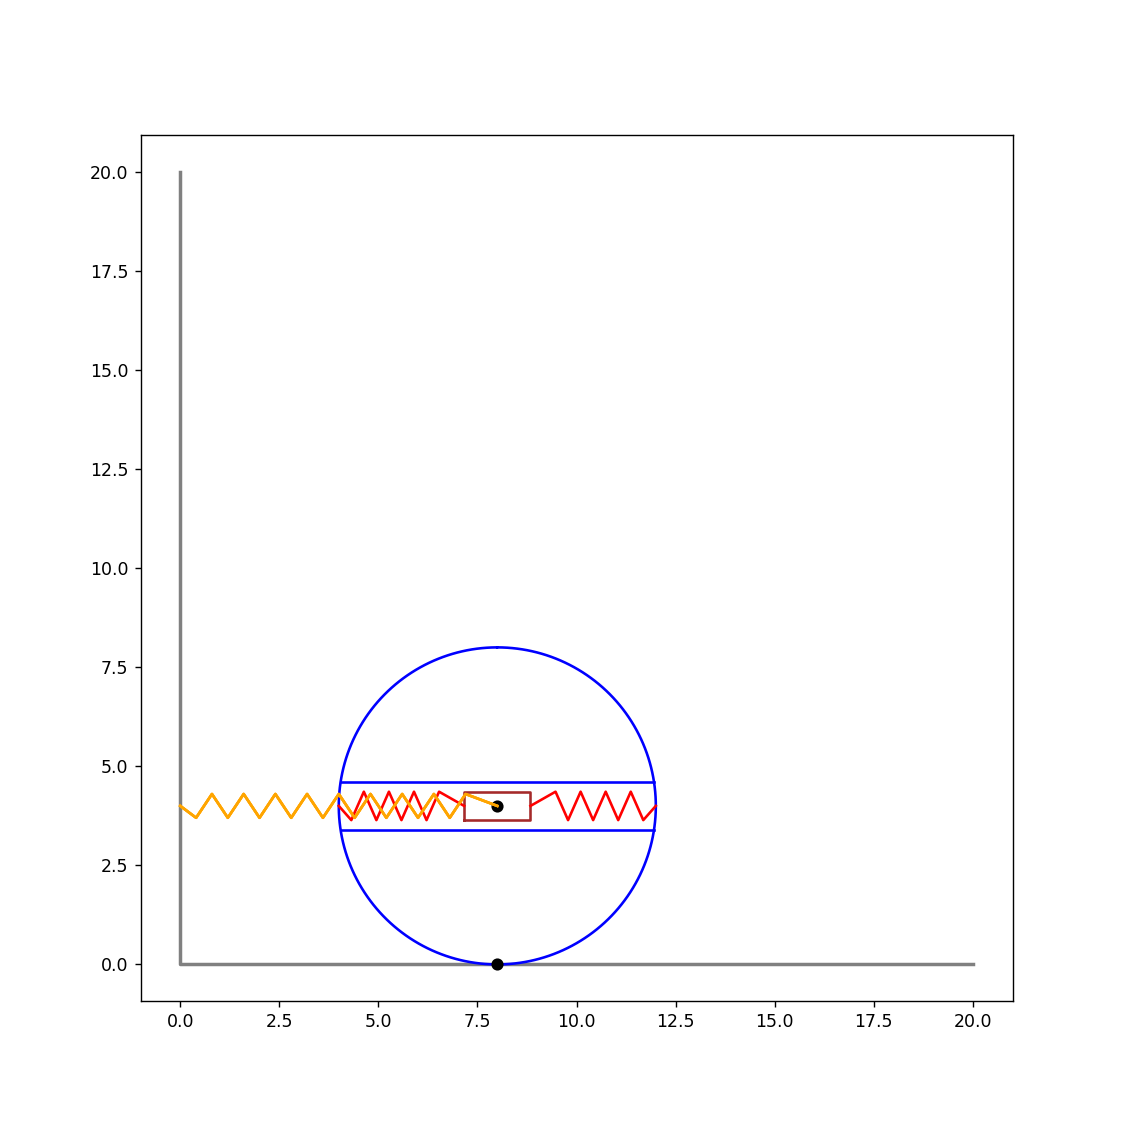

TypeError: can only concatenate list (not "float") to list

In [10]:
fig = plt.figure(figsize=[9, 9])    # создаём большое красивое окно
ax = fig.add_subplot(1,1,1)         # создаём место для рисования
ax.axis('equal')
ax.set(xlim=[-1, 21], ylim=[-1, 21])  # пределы по осям

Ground = ax.plot([0, 0, 20], [20, 0, 0], color='gray', linewidth=2)[0]
Circle = ax.plot(X_Wheel, Y_Wheel, color='blue')[0]
Point_O = ax.plot(SprX+WheelR, WheelR, marker='o', color='black')[0]
Point_B = ax.plot(SprX+WheelR, 0, marker='o', color='black')[0]
Drawn_Spring1 = ax.plot(Spr1_kords[0], Spr1_kords[1], color='orange')[0]
Box = ax.plot(Box_kords[0], Box_kords[1], color='brown')[0]
Drawn_Spring2 = ax.plot(Spr2_kords[0], Spr2_kords[1], color='red')[0]
Drawn_Spring3 = ax.plot(Spr3_kords[0], Spr3_kords[1], color='red')[0]
Wall1 = ax.plot([SprX+WheelR*(1+np.cos(-alpha)), SprX+WheelR*(1+np.cos(alpha+np.pi))],
                [WheelR*(1+np.sin(-alpha)), WheelR*(1+np.sin(alpha+np.pi))], color='blue')[0]
Wall2 = ax.plot([SprX+WheelR*(1+np.cos(-alpha+np.pi)), SprX+WheelR*(1+np.cos(alpha))],
                [WheelR*(1+np.sin(-alpha+np.pi)), WheelR*(1+np.sin(alpha))], color='blue')[0]
ite = np.linspace(0, 10, 3001)
kino = animation.FuncAnimation(fig, TheMagicOfThtMovement, frames=len(t), interval=20) # Анимация

from IPython.display import HTML
HTML(kino.to_jshtml())